In [1]:
# Multiple fleets, Graphs

#### On Feb 28 2023 

In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [47]:
path = 'H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/'
path_data = path + 'data/'
path_output = path + 'plots/'

In [48]:
#df_lorenz = pd.read_csv('C:/Users/annik/tmpOnATBcomputer/sf_2018_stacked_rh_fltsz_price_1.csv')
#df_lorenz = pd.read_csv('H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/data/mult_fleets/sf_2018_stacked_rh_fltsz_price_incRank_1_2_modifiedLeverNumbers.csv')
df_lorenz = pd.read_csv(path_data + 'sf_2018_stacked_rh_fltsz_price_incRank_1_2_modifiedLeverNumbers.csv')

In [78]:
#df_lorenz.info()
#print(df_lorenz.columns.tolist())
#print(df_lorenz.columns.values)

## Define what the baseline is

In [79]:
df_lorenz["theNumber1"] = 1
df_lorenz["baseline"] = df_lorenz["theNumber1"].where( df_lorenz['lever_position_price'].eq(1.0) 
                                                     & df_lorenz['lever_position_fltsz'].eq(1.0) 
                                                     & df_lorenz['lever_n_fleets'].eq(2.0),
                                                     0)

Make a Relative to Baseline variable

In [80]:
# CHOOSE which to make relative to baseline
temp_varName = "mode_ride_hail_solo_sum" # Potential_INEXUS_mean
temp_varNameRel = "mode_ride_hail_solo_sumRELATIVE" # 

df_lorenz['temp_varName_baseOnly'] = df_lorenz[temp_varName].where(df_lorenz['baseline']==1) # only not NA if it's at baseline
df_lorenz['temp_varName_base'] = df_lorenz.groupby(["incRank"])['temp_varName_baseOnly'].transform('max')
df_lorenz[temp_varNameRel]=df_lorenz[temp_varName]-df_lorenz['temp_varName_base']

Examine relative

In [81]:
#df_lorenz.groupby(["incRank"])[temp_varName].describe()
#df_lorenz.groupby(["incRank"])['temp_varName_base'].describe()
#df_lorenz[['baseline','incRank',temp_varNameRel,'temp_varName_base','incomeInThousands_mean','Potential_INEXUS_mean','temp_varName_baseOnly','temp_varName_base',temp_varNameRel,'lever_n_fleets', 'lever_position_fltsz','lever_position_price']].head(56)

In [72]:
#plt.hist(df_lorenz[temp_varNameRel])

Graph setup

In [82]:
sns.set(rc={'figure.figsize':(20,14)})
sns.set_theme(style="whitegrid")

In [83]:
#filename  = path_output + temp_varName + "__" + datetime.now().strftime('%m_%d_%Y_%H_%M_%S') + '.svg'
print(filename)

H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/plots/not__03_02_2023_15_56_26.svg


H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/plots/not__03_02_2023_15_57_16.svg


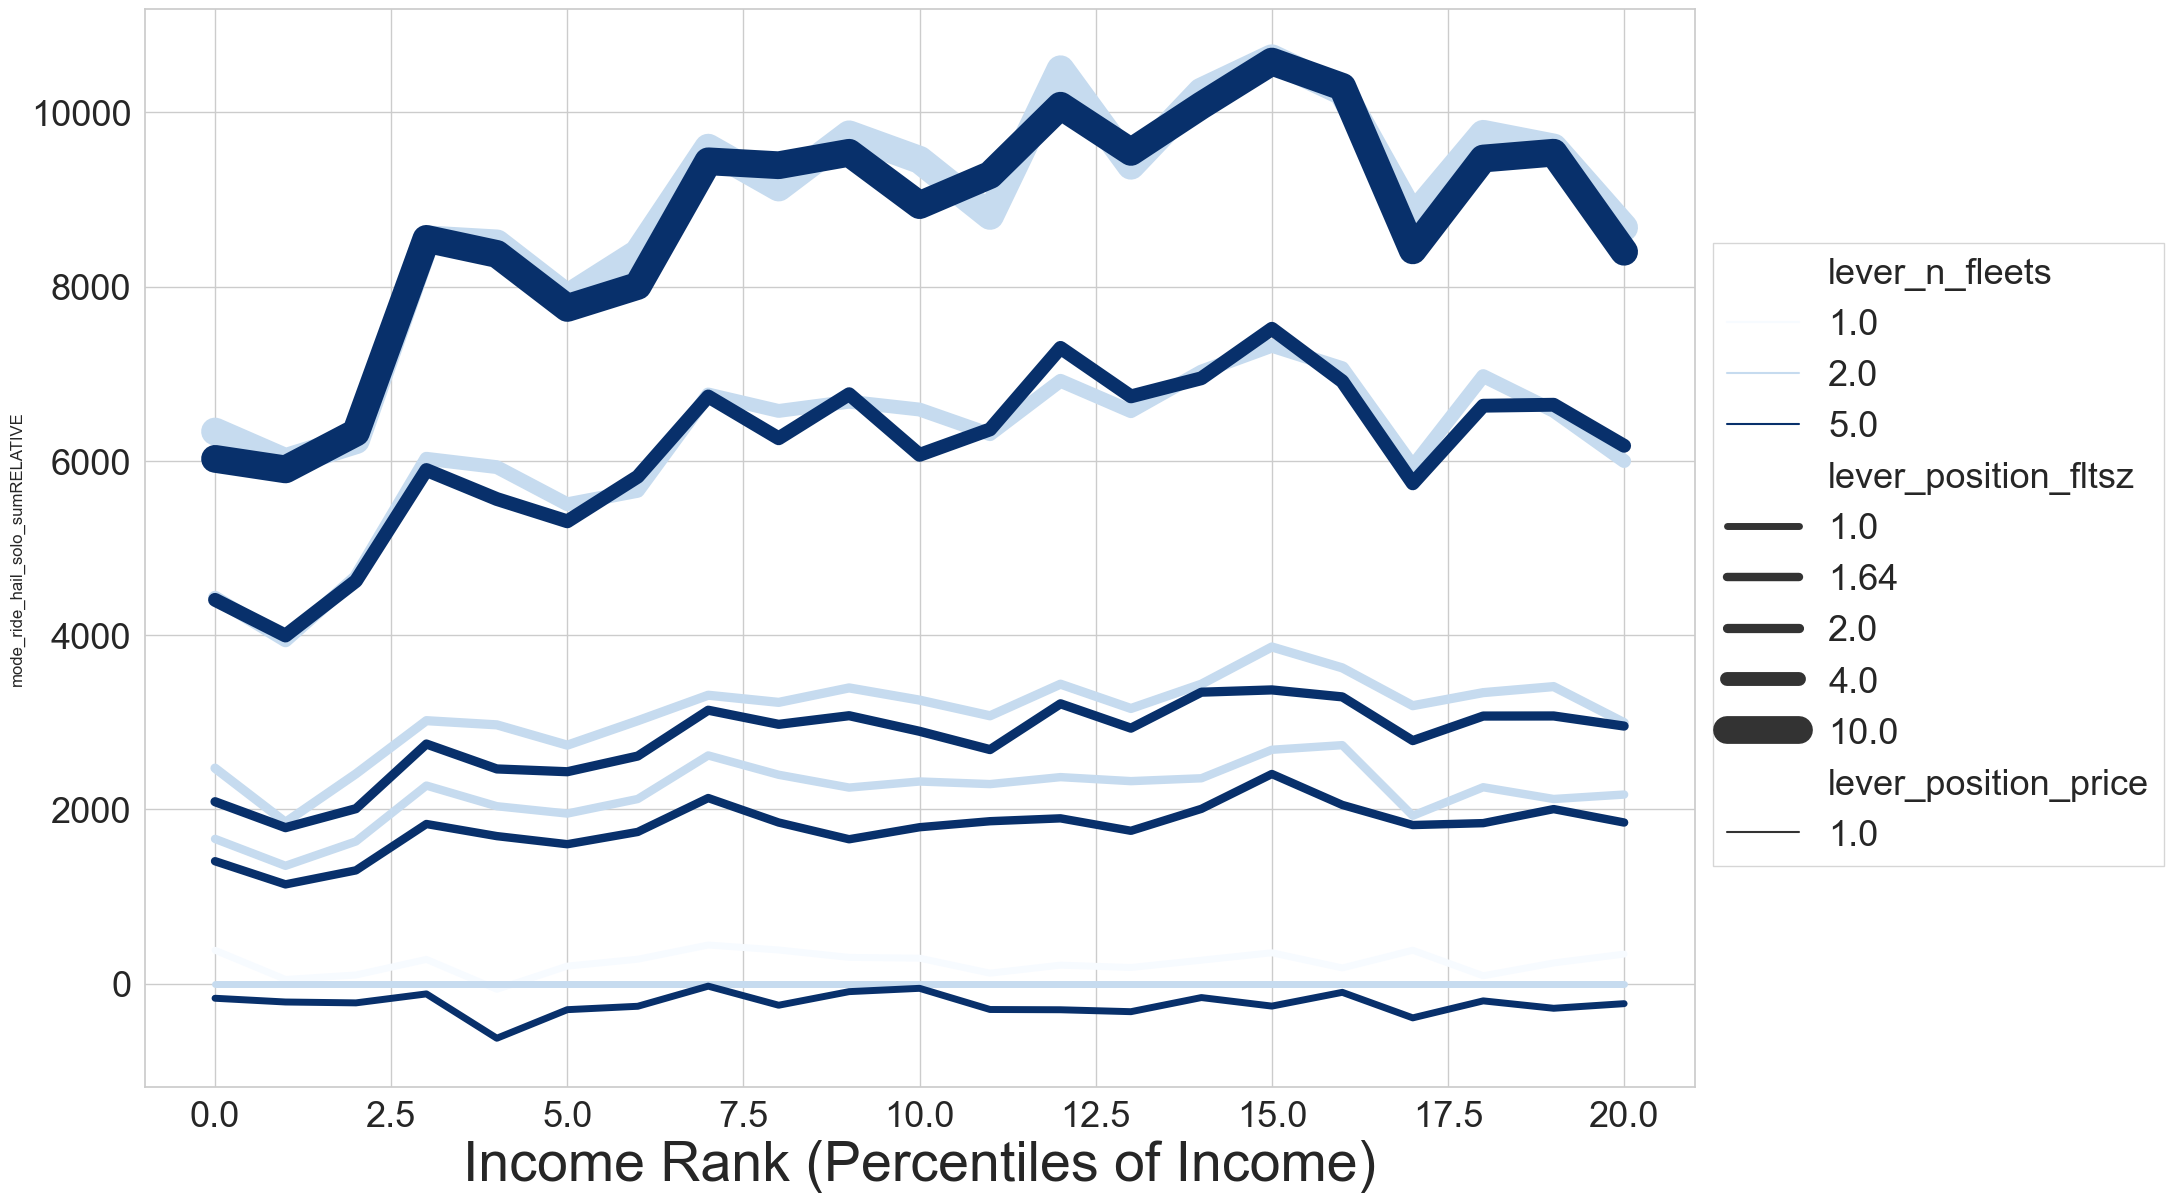

In [84]:
t_plot = sns.lineplot(data = df_lorenz.loc[ (df_lorenz['lever_position_price']==1)
                                           &(df_lorenz['lever_position_fltsz']>=-1)
                                           &(df_lorenz['lever_n_fleets']>=0)], 
            x = 'incRank', 
            y = temp_varName, #temp_varNameRel
            hue = 'lever_n_fleets', # hue, style, size
            style = 'lever_position_price',
            size ="lever_position_fltsz", sizes=(5,20),
                      #size_order=["T1", "T2"],
             #palette = palette, 
            ci=None, linewidth = 6,
            palette = 'Blues'
            )
t_plot.set_xlabel('Income Rank (Percentiles of Income)', fontsize = 40)
#t_plot.set_ylabel('ggg', fontsize = 40)
t_plot.yaxis.set_tick_params(labelsize = 26)
t_plot.xaxis.set_tick_params(labelsize = 26)
t_plot.legend(fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
# SAVE

import datetime
now = datetime.datetime.now()
filename  = path_output + 'not' + "__" + datetime.datetime.now().strftime('%m_%d_%Y_%H_%M_%S') + '.svg'
print(filename)
plt.savefig(filename, format='svg')
#plt.savefig('lorenz_viridisATB.png', dpi=1000)

In [ ]:
#fig, ax = plt.subplots()
#ax = sns.lineplot(data = df_lorenz.loc[(df_lorenz['lever_position']>-1)|(df_lorenz['lever_position_fleetsize']==1)], x = 'incRank', 
#plt.legend(labels = ['0% Price', '12.5% Price', '25% Price','50% Price','Baseline','175% Price','300% Price', '500% Price','800% Price'],